In [1]:
import sys, os
# Uncomment the line below if you want to run on CPU
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import pandas as pd
#from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_dl_model, train_transf_chik
from train_models import LOOK_BACK, PREDICT_N
from train_models import train_pgbm_model, apply_dengue_pgbm_on_chik
sys.path.append('../')
from lstm import apply_model
from pgbm_model import pgbm_pred

2023-11-24 17:17:12.571247: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 17:17:12.591244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 17:17:12.591269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 17:17:12.591930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 17:17:12.596318: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_csv('selected_cities.csv', index_col = 'Unnamed: 0')
df.head()

,geocode,state,sum_cases,POP22,inc,n_last_ep,year_first_ep,year_last_ep_before_2023,region,region_codes,start_train_chik,end_train_chik
0,2211001,PI,2325,868523,267.695847,4,2015,2022,ne,1,2014-10-01,2022-11-01
1,2913606,BA,1858,197163,942.367483,2,2015,2016,ne,1,2014-10-01,2016-11-01
2,2914802,BA,1846,185500,995.148248,2,2016,2022,ne,1,2015-10-01,2022-11-01
3,2111300,MA,1788,1061374,168.460882,2,2016,2022,ne,1,2015-10-01,2022-11-01
4,2925303,BA,1687,158736,1062.770890,2,2016,2017,ne,1,2015-10-01,2017-11-01


In [3]:

city = 2802106
df = df.loc[df.geocode == city]
state = df.state
INI_DATE = df.start_train_chik.values[0]
END_DATE_TRAIN = df.end_train_chik.values[0]
END_DATE = '2023-11-01'

In [4]:
print('INI_DATE:', INI_DATE)
print('END_DATE_TRAIN:', END_DATE_TRAIN)

INI_DATE: 2014-10-01
END_DATE_TRAIN: 2021-11-01


### Train the dengue DL model:

2023-11-24 17:03:10.258724: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 17:03:10.258862: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 17:03:10.258963: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Compilation Time :  0.003449678421020508
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52, 240)]         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 64)            156160    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                    

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

Epoch 1/250


2023-11-24 17:03:13.150121: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0ee4012b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-24 17:03:13.150142: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-11-24 17:03:14.046919: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1700856194.076158   40723 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-24 17:03:14.398775: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


421/421 [==============================] - 6s 6ms/step - loss: 0.0990 - accuracy: 0.2613 - mape: 16806160.0000 - mse: 0.0253 - val_loss: 0.0832 - val_accuracy: 0.2057 - val_mape: 10123784.0000 - val_mse: 0.0207
Epoch 2/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.2280 - mape: 10255382.0000 - mse: 0.0208 - val_loss: 0.0628 - val_accuracy: 0.2695 - val_mape: 5703641.0000 - val_mse: 0.0140
Epoch 3/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0584 - accuracy: 0.2542 - mape: 6508434.0000 - mse: 0.0151 - val_loss: 0.0532 - val_accuracy: 0.3972 - val_mape: 1661212.1250 - val_mse: 0.0131
Epoch 4/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.2637 - mape: 5432649.5000 - mse: 0.0137 - val_loss: 0.0477 - val_accuracy: 0.3050 - val_mape: 2518996.0000 - val_mse: 0.0136
Epoch 5/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0450 - accuracy: 0.2352 - mape: 6403337.5000 - m

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


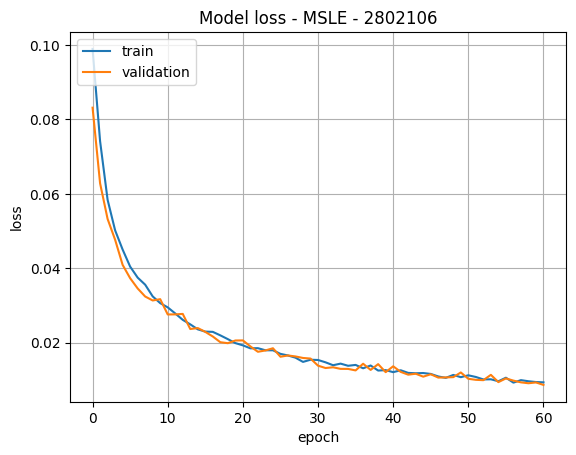

CPU times: user 4min 4s, sys: 7.21 s, total: 4min 12s
Wall time: 3min 33s


In [5]:
%%time 
train_dl_model(city,   doenca = 'dengue', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    

### Function to apply dengue model on dengue data: 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

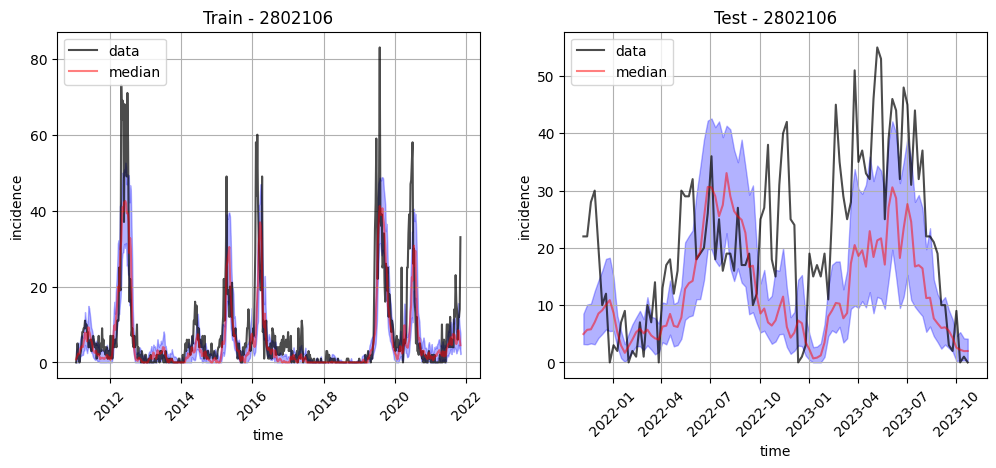

CPU times: user 2min 5s, sys: 3.15 s, total: 2min 8s
Wall time: 1min 51s


In [6]:
%%time 
# apply NN model 
metrics = apply_model(city, ini_date = None, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/dengue_{city}_cluster.csv')
    

### Apply this dengue DL model on chik data: 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

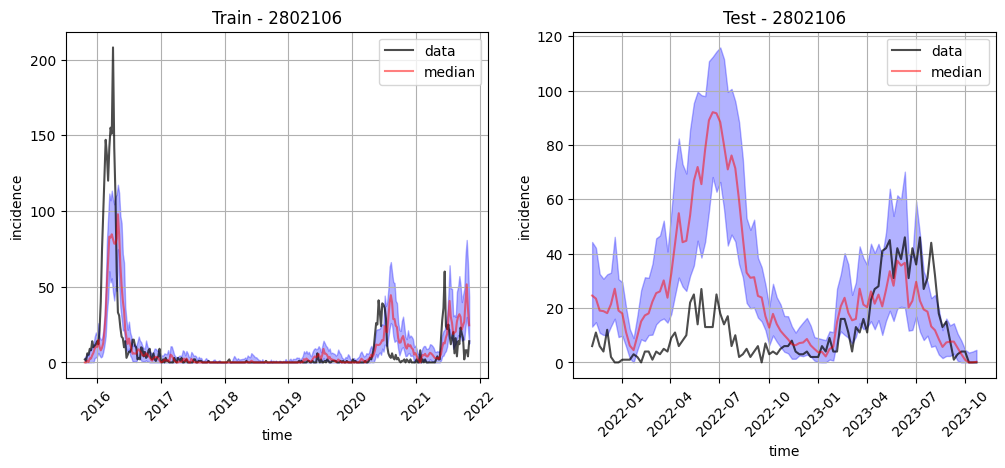

CPU times: user 1min 21s, sys: 2.34 s, total: 1min 23s
Wall time: 1min 15s


In [7]:
%%time 

# apply NN model 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

## Apply the transfer: 

2023-11-24 17:17:24.319629: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 17:17:24.319908: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 17:17:24.320524: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Compilation Time :  0.0014574527740478516
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52, 240)]         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 64)            156160    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                   

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

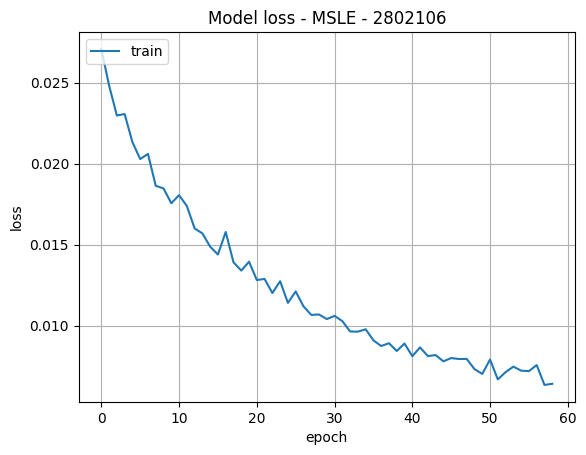

CPU times: user 2min 19s, sys: 4.46 s, total: 2min 23s
Wall time: 2min 2s


In [5]:
%%time 

train_transf_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

Apply the transfer model:

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

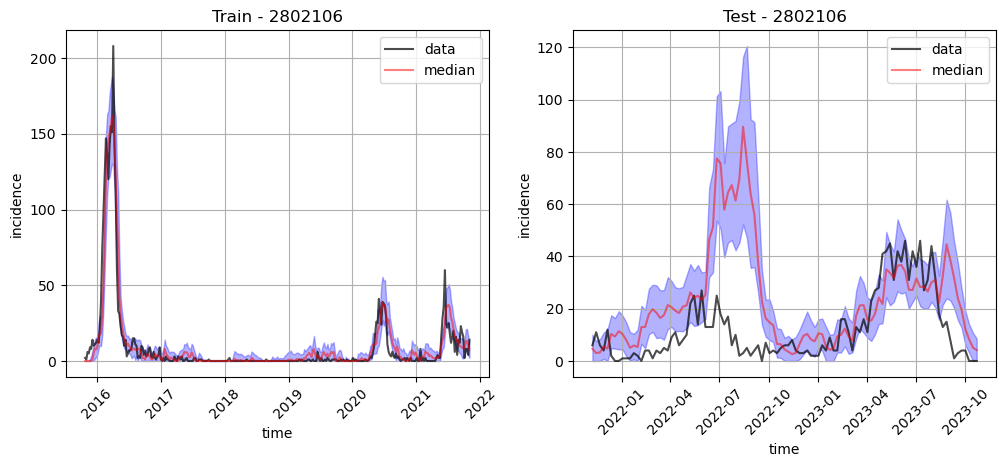

In [9]:
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_transf_pred',
                    model_name = f'trained_{city}_chik_transf_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

### Train the chik DL model:

Compilation Time :  0.01261591911315918
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 52, 138)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 64)           103936    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                   

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

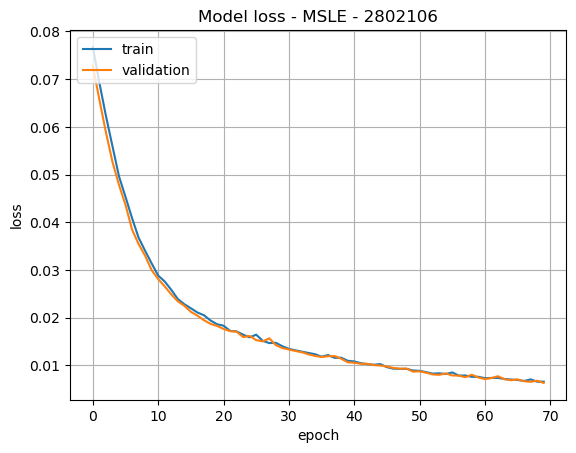

CPU times: user 16min 15s, sys: 47.7 s, total: 17min 3s
Wall time: 17min 14s


In [19]:
%%time 

train_dl_model(city,   doenca = 'chik', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    
    

### Apply the DL chik model on chik data

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

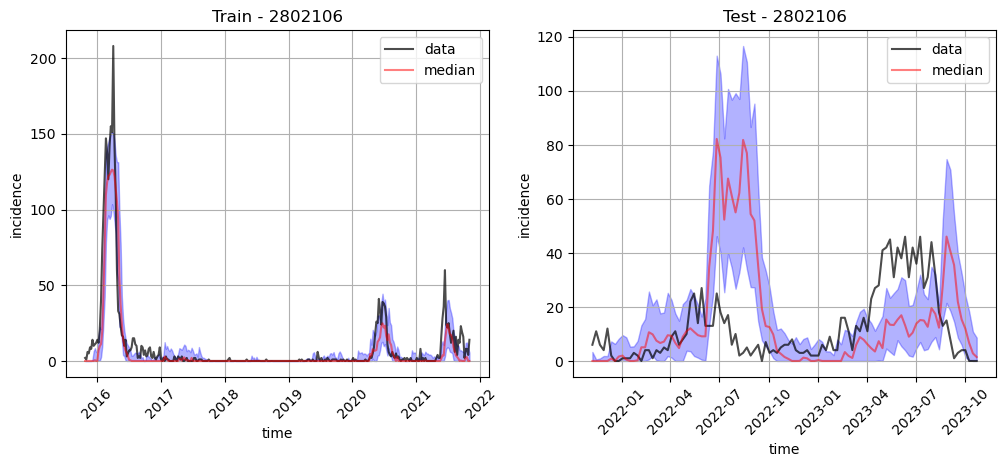

CPU times: user 10min 54s, sys: 16 s, total: 11min 10s
Wall time: 11min 8s


In [20]:
%%time 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_pred',
                    model_name = f'trained_{city}_chik_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

### Train the dengue pgbm model 

In [5]:
%%time
train_pgbm_model(city, 'dengue', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 5min 32s, sys: 2min 25s, total: 7min 57s
Wall time: 1min 21s


### Apply the dengue pgbm on dengue data

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


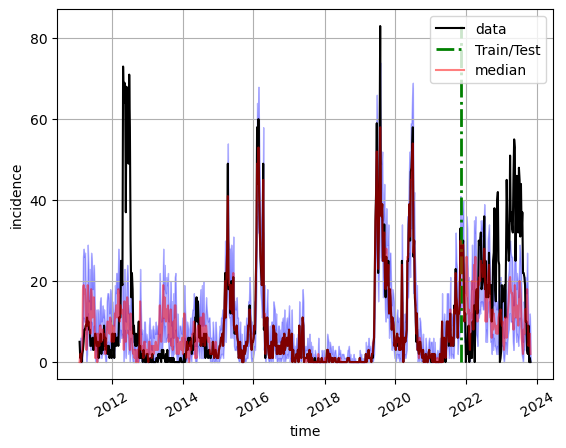

CPU times: user 9.34 s, sys: 1.46 s, total: 10.8 s
Wall time: 3.63 s


HistGradientBoostingRegressor(distribution='negativebinomial',
                              l2_regularization=0.1, random_state=0)

In [6]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'dengue', ratio = 0.75, ini_date = None, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/dengue_{city}_cluster.csv', plot = True)

### Apply the dengue pgbm model on chik:

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


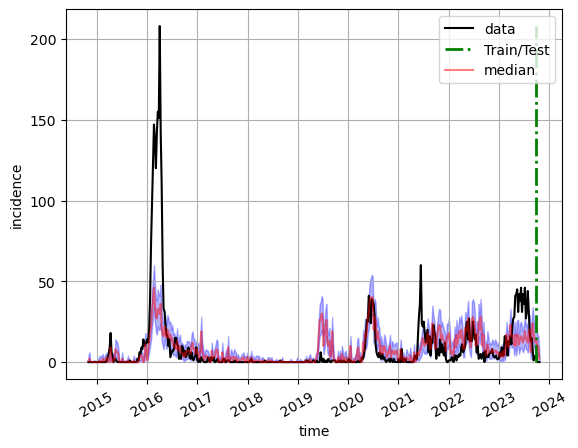

In [5]:
apply_dengue_pgbm_on_chik(city, ini_date= INI_DATE, end_date = END_DATE)

### Train the chik PGBM model:

In [8]:
%%time
train_pgbm_model(city, 'chik', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 5min 48s, sys: 2min 34s, total: 8min 22s
Wall time: 1min 22s


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


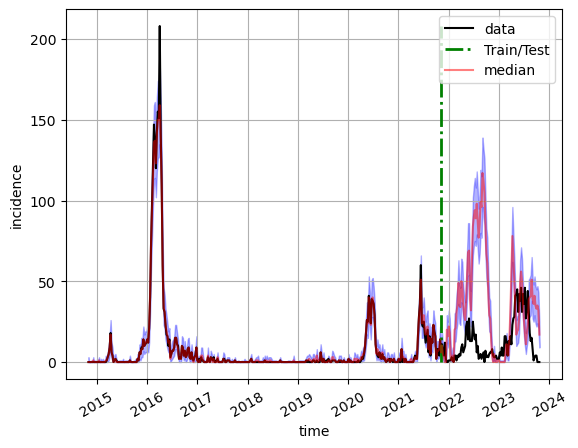

CPU times: user 7.16 s, sys: 1.49 s, total: 8.64 s
Wall time: 2.71 s


HistGradientBoostingRegressor(distribution='negativebinomial',
                              l2_regularization=0.1, random_state=0)

In [9]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'chik', ratio = 0.75, ini_date = INI_DATE, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/chik_{city}_cluster.csv')